# Library

In [1]:
# Library Scrapping 
# pip install requests
# pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Get Content HTML

In [2]:
# First of all we need to check the capability of the website ("https://www.worldometers.info/coronavirus") to be scrapped
Link  = "https://www.worldometers.info/coronavirus"
page = requests.get(Link)

# Check the status of the website
# Check Status Code (check at : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)
page.status_code

200

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li
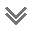

In [3]:
# Check Content
print(page.content)

# Parsing HTML

In [4]:
#Start Parsing using "HTML-5" parser
soup = BeautifulSoup(page.content, "html.parser")
soup.head()

[<meta charset="utf-8"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <title>COVID - Coronavirus Statistics - Worldometer</title>,
 <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>,
 <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>,
 <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>,
 <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>,
 <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>,
 <link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>,
 <link href="/favicon/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>,
 <link href="/favicon/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120

# Inspect Element form Web and extract the content

After inspecting the elements from the web world do meter, we get: <br/>
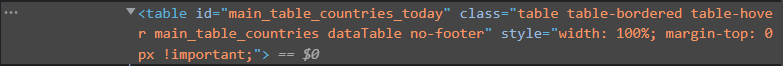


In [5]:
# Search the table and extract the table
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# Get the text from extracted table

In [6]:
# Get the text from 'tr' tag (tr=table row)
rows = table.find_all("tr", attrs={"style": ""})

In [7]:
# Store the data in a list
data = []
for i,item in enumerate(rows):
    if i == 0:
        data.append(item.text.strip().split("\n")[:13])
    else:
        data.append(item.text.strip().split("\n")[:12])

In [8]:
# Check the data
data[:2]

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests'],
 ['World',
  '683,567,637',
  '+41,031',
  '6,828,672',
  '+157',
  '656,524,151',
  '+65,640',
  '20,214,814',
  '40,033',
  '87,695',
  '876.1',
  '']]

# Coverting list to dataframe using Pandas

In [9]:
# Convert the data into a dataframe
dt = pd.DataFrame(data)
dt = pd.DataFrame(data[1:], columns=data[0][:12]) #Formatting the header

# Check the data
dt

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,World,"683,567,637","+41,031","6,828,672",+157,"656,524,151","+65,640","20,214,814","40,033","87,695",876.1,
1,1,USA,"106,120,651",,"1,153,972",,"103,838,726",,"1,127,953","2,062","316,962","3,447"
2,2,India,"44,709,676",,"530,848",,"44,166,925",,"11,903",N/A,"31,785",377
3,3,France,"39,771,704",,"165,573",,"39,473,539",,"132,592",869,"606,419","2,525"
4,4,Germany,"38,343,472",,"170,627",,"38,064,200","+12,500","108,645",N/A,"457,103","2,034"
...,...,...,...,...,...,...,...,...,...,...,...,...
220,224,Montserrat,"1,403",,8,,"1,376",,19,,"282,578","1,611"
221,225,Niue,797,,,,794,,3,,"491,369",
222,230,Tokelau,5,,,,,,5,,"3,628",
223,231,China,"503,302",,"5,272",,"379,053",,"118,977",N/A,347,4


# Do the preprocessing by your self